 ####                                             DEEP LEARNING PROJECT ON NO BALL DETECTION USING CNN

This project helps us to detects the image, whether it is either legal delivery or a No ball.Cricket is a worldwide popular game where different technologies are being used to help the match umpires to make decisions. Often due to the human perception, deciding whether a bowled delivery is a no-ball or legal ball which causes controversy. As only a single ball can change the fate of the game, so it is obvious to make accurate decision regarding no ball . 


Cricket  is a game of bat and ball where a single
delivery can turn the expected winner into loser. So, every
delivery is counted as crucial moment for both teams. In every
cricket match, umpires are responsible for deciding the
approval of a ball bowled by a bowler. There are many
scenarios when a delivery is disapproved by umpires. Some of
the scenarios are declared as No Ball . A No Ball can be
declared for illegal actions by bowlers or fielders. As a
consequence of a No Ball, the opposition team gets an extra
run and delivery. Furthermore, batsman will not be given out
except run out. One of the most common reasons is
overstepping of popping crease by front foot during delivering
the ball. But the examination of this kind of No Ball requires
some minutes in certain cases using television replay. So
umpires make their decisions on their perception. But human
perception cannot be accurate all the time. Besides, it is not
always possible to conclude the accurate judgment because of
the limitations of existing technology . In that case, the
benefit of doubt goes with the batting team. And this
creates mass confusion and debates among the viewers and
cricket lovers. 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
model  = Sequential()
model.add(Conv2D(32,(2,2), input_shape =(64,64,3)))
model.add(Activation ('relu'))
model.add(MaxPooling2D (pool_size = (2,2)))

model.add(Conv2D( 64,(2,2), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D( pool_size=(2,2)))

model.add(Conv2D(128,(2,2), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D (pool_size=(2,2)))

model.add(Conv2D(256,(2,2), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = (1,1)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile (loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


In [7]:
train_data = ImageDataGenerator(rescale = 1./255)
test_data  = ImageDataGenerator(rescale = 1./255)

training_data = train_data.flow_from_directory(r"D:\study material\DL_project_datasets\train",
                                              target_size = (64,64),
                                              batch_size = 32,
                                              class_mode = "categorical")

testing_data = test_data.flow_from_directory(r"D:\study material\DL_project_datasets\test",
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = "categorical")

model_summary = model.fit_generator(training_data,steps_per_epoch= 800, epochs = 8,
                                    validation_data= testing_data,
                                    validation_steps=200)



Found 180 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Epoch 1/8
800/800 [==============================] - 521s 652ms/step - loss: 6.4678e-06 - accuracy: 1.0000 - val_loss: 1.4818 - val_accuracy: 0.8167
Epoch 2/8
800/800 [==============================] - 518s 648ms/step - loss: 1.1534e-06 - accuracy: 1.0000 - val_loss: 2.3572 - val_accuracy: 0.8000
Epoch 3/8
800/800 [==============================] - 528s 660ms/step - loss: 2.9093e-07 - accuracy: 1.0000 - val_loss: 0.9251 - val_accuracy: 0.8000
Epoch 4/8
800/800 [==============================] - 523s 654ms/step - loss: 1.3014e-07 - accuracy: 1.0000 - val_loss: 3.5543 - val_accuracy: 0.8000
Epoch 5/8
800/800 [==============================] - 522s 653ms/step - loss: 7.0273e-08 - accuracy: 1.0000 - val_loss: 3.2032 - val_accuracy: 0.8000
Epoch 6/8
800/800 [==============================] - 523s 654ms/step - loss: 4.4593e-08 - accuracy: 1.0000 - val_loss: 3.6836 - val_accuracy: 0.8000
Epoch 7/8
800/800 [======

In [8]:
training_data.class_indices

{'legal_ball': 0, 'no_ball': 1}

In [13]:
test_image = image.load_img(r'D:\study material\DL_project_datasets\test\no_ball\images (4).jpg',
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    print('legal_ball')
elif result[0][1]==1:
    print('no_ball')

    

no_ball


In [11]:
pd.DataFrame(model.history.history)

,val_loss,val_accuracy,loss,accuracy
0,1.481829,0.816667,6.508220e-06,1.0
1,2.357207,0.800000,1.157948e-06,1.0
2,0.925107,0.800000,2.920954e-07,1.0
3,3.554270,0.800000,1.304135e-07,1.0
4,3.203150,0.800000,7.070342e-08,1.0
5,3.683586,0.800000,4.487116e-08,1.0
6,3.460812,0.800000,2.398301e-08,1.0
7,2.151546,0.800000,1.777915e-08,1.0


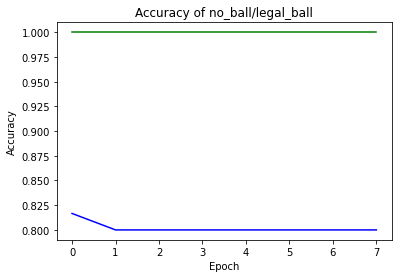

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(model.history.history['accuracy'], color = 'green')
plt.plot(model.history.history['val_accuracy'], color = 'blue')
plt.title('Accuracy of no_ball/legal_ball')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [15]:
model.save('no_ball_detection.h5')

#### Conclusion

we get a overall validation accuracy of 80% in detecting the image whether no_ball delivery or legal_delivery